### pip install & import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
#import pandas_profiling
import datetime

# 전처리된 파일 불러오기

In [2]:
df = pd.read_csv('../1_preprocessing/preprocessing.csv',encoding='utf-8')
df.head()

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,1,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,"33,121,225,810","4,163,666",사극,15세관람가,일반영화
1,2,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,"31,858,660,536","3,638,287",코미디,15세관람가,일반영화
2,3,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,"27,530,825,087","3,346,172",판타지,12세관람가,일반영화
3,4,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,"25,842,519,330","3,233,946",드라마,12세관람가,일반영화
4,5,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,"33,577,136,860","3,597,963",액션,12세관람가,일반영화


# 데이터 리사이징 하기
전국 스크린수, 전국 관객수 좌로 편향된 그래프 pr_report.html(태현폴더) <br>
때문에 아래의 리사이징 실행


### movie_resize2

In [ ]:
# movie_resize = df[(df['전국 관객수'] > 10000)]
# movie_resize.info()

In [70]:
# 전국 스크린수 50 초과 , 전국 관객수 1000명 초과 1100만 미만(1100만 이상은 이상치로 생각) 

movie_resize2 = df[(df['전국 관객수'] > 1000) & (df['전국 스크린수'] > 50)& (df['전국 관객수'] < 11000000)]
movie_resize2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 24 to 7884
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   순번       4148 non-null   int64 
 1   영화명      4148 non-null   object
 2   감독       4148 non-null   object
 3   배급사      4148 non-null   object
 4   개봉일      4148 non-null   object
 5   영화형태     4148 non-null   object
 6   국적       4148 non-null   object
 7   전국 스크린수  4148 non-null   int64 
 8   전국 매출액   4148 non-null   int64 
 9   전국 관객수   4148 non-null   int64 
 10  서울 매출액   4148 non-null   object
 11  서울 관객수   4148 non-null   object
 12  장르       4148 non-null   object
 13  등급       4148 non-null   object
 14  영화구분     4148 non-null   object
dtypes: int64(4), object(11)
memory usage: 518.5+ KB


In [ ]:
### 데이터 리사이징
movie_resize_ALL : 관객수 1000명 초과, 전국 스크린수 50 초과   
movie_resize_회귀 : 관객수 10000명 초과, 관객수 100000 미만 전국 스크린수 50 초과   
movie_resize_분류 : 관객수 800000명 초과, 전국 스크린수 50 초과   



In [90]:
# movie resize 별로 변경(ALL,회귀,분류)

# 전국 스크린수 50 초과 , 전국 관객수 1000명 초과 1100만 미만(1100만 이상은 이상치로 생각) 
movie_resize_ALL = df[(df['전국 관객수'] > 1000) & (df['전국 스크린수'] > 50)]
movie_resize_회귀 = df[(df['전국 관객수'] > 10000) & (df['전국 스크린수'] > 50) & (df['전국 관객수'] < 100000)]
movie_resize_분류 = df[(df['전국 관객수'] > 800000) & (df['전국 스크린수'] > 50)]

movie_resize_ALL.info()
movie_resize_회귀.info()
movie_resize_분류.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4168 entries, 0 to 7884
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   순번       4168 non-null   int64 
 1   영화명      4168 non-null   object
 2   감독       4168 non-null   object
 3   배급사      4168 non-null   object
 4   개봉일      4168 non-null   object
 5   영화형태     4168 non-null   object
 6   국적       4168 non-null   object
 7   전국 스크린수  4168 non-null   int64 
 8   전국 매출액   4168 non-null   int64 
 9   전국 관객수   4168 non-null   int64 
 10  서울 매출액   4168 non-null   object
 11  서울 관객수   4168 non-null   object
 12  장르       4168 non-null   object
 13  등급       4168 non-null   object
 14  영화구분     4168 non-null   object
dtypes: int64(4), object(11)
memory usage: 521.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 2550 to 4828
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   순번       1603 non-null

c:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전국 관객수', ylabel='Density'>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


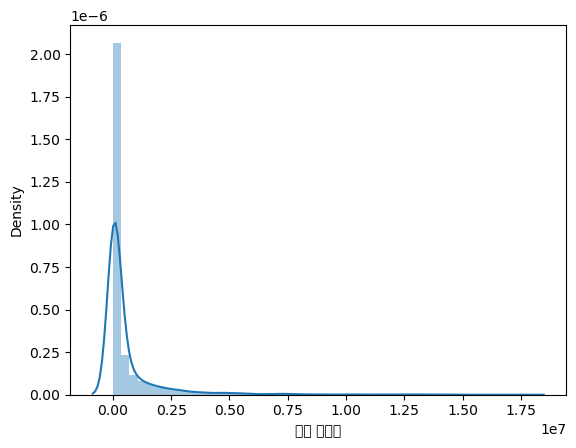

In [87]:
sns.distplot(movie_resize_ALL['전국 관객수'])

c:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전국 관객수', ylabel='Density'>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


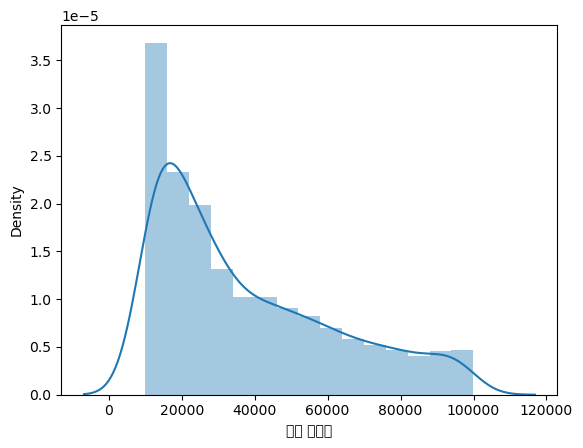

In [91]:
sns.distplot(movie_resize_회귀['전국 관객수'])

c:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전국 관객수', ylabel='Density'>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


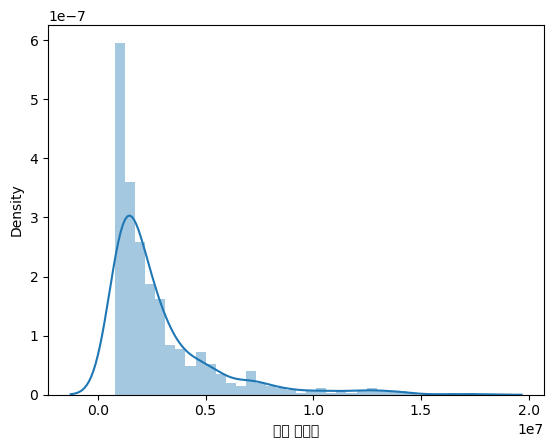

In [73]:
sns.distplot(movie_resize_분류['전국 관객수'])

### 배급사 데이터 변경
KOBIS_개봉일람_2023-03-23 에서 (주)넥스트엔터테인먼트월드(NEW), (주)시너지하우스 (시너지) => 해당 내용을 엑셀에서 (new), (시너지)를 없음으로 변경   
위와 같이 설정을 안하면 위에 데이터가 아예 지워지므로, 엑셀에서 바꾸기를 통해 (new), (시너지) 를 빈칸으로 변경 

In [74]:
# 점수 처리를 위해 변경

# '( )' 안쪽의 글씨 (ex> (주), (유), (사) etc.,) 함께 삭제
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace(r"\(.*\)","") 
movie_resize2['배급사']=movie_resize_회귀.배급사.str.replace("㈜","")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("주식회사","")

# (주)씨제이이엔엠 으로 통일
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("CJ ENM","씨제이이엔엠")

# 롯데엔터테인먼트 로 통일
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("롯데쇼핑롯데엔터테인먼트","롯데엔터테인먼트")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("롯데컬처웍스(주)롯데엔터테인먼트","롯데엔터테인먼트")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("롯데쇼핑(주)롯데시네마","롯데엔터테인먼트")


# 월트디즈니스튜디오스코리아 로 통일
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("월트디즈니컴퍼니코리아 유한책임회사","월트디즈니스튜디오스코리아")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("소니픽쳐스릴리징월트디즈니스튜디오스코리아","월트디즈니스튜디오스코리아")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("브에나비스타인터내셔널코리아","월트디즈니스튜디오스코리아")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("소니픽쳐스엔터테인먼트코리아식회사극장배급지점","월트디즈니스튜디오스코리아")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("한국소니픽쳐스릴리징브에나비스타영화㈜","월트디즈니스튜디오스코리아")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("소니픽쳐스릴리징코리아","월트디즈니스튜디오스코리아")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("월트디즈니코리아","월트디즈니스튜디오스코리아")
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("월트디즈니컴퍼니코리아","월트디즈니스튜디오스코리아")

# 이십세기폭스코리아 로 통일
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("이십세기폭스필름코퍼레이션","이십세기폭스코리아")

# 이름 통일 (KBS 미디어)
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("케이비에스미디어","KBS 미디어")

# 이름 통일 (에스케이 텔레콤)
movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace("에스케이플래닛","에스케이텔레콤")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\4110717408.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace(r"\(.*\)","")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\4110717408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['배급사']=movie_resize_회귀.배급사.str.replace(r"\(.*\)","")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\4110717408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

### 국적 데이터 변경

In [75]:
# 국적 데이터 변경
for idx, row in movie_resize_회귀.iterrows():
    if  row['국적'] not in ['미국', '한국', '일본', '영국', '프랑스','중국','독일']:
        movie_resize_회귀['국적'][idx] = '기타'

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\714894809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['국적'][idx] = '기타'


In [76]:
# 값 확인

movie_resize_회귀['국적'].value_counts()


미국     513
한국     377
기타     222
일본     201
영국     112
프랑스     80
중국      67
독일      31
Name: 국적, dtype: int64

### 날짜 데이터 datetime으로 변경

In [77]:
# 날짜 데이터를 datetime으로 변경
movie_resize_회귀['개봉일'] = movie_resize_회귀['개봉일'].astype('datetime64')
movie_resize_회귀['연도'] = movie_resize_회귀['개봉일'].dt.year
movie_resize_회귀['월'] = movie_resize_회귀['개봉일'].dt.month

movie_resize_회귀.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 2550 to 4828
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순번       1603 non-null   int64         
 1   영화명      1603 non-null   object        
 2   감독       1603 non-null   object        
 3   배급사      1603 non-null   object        
 4   개봉일      1603 non-null   datetime64[ns]
 5   영화형태     1603 non-null   object        
 6   국적       1603 non-null   object        
 7   전국 스크린수  1603 non-null   int64         
 8   전국 매출액   1603 non-null   int64         
 9   전국 관객수   1603 non-null   int64         
 10  서울 매출액   1603 non-null   object        
 11  서울 관객수   1603 non-null   object        
 12  장르       1603 non-null   object        
 13  등급       1603 non-null   object        
 14  영화구분     1603 non-null   object        
 15  연도       1603 non-null   int64         
 16  월        1603 non-null   int64         
dtypes: datetime64[ns](1), int64(6)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\3343544610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['개봉일'] = movie_resize_회귀['개봉일'].astype('datetime64')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\3343544610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['연도'] = movie_resize_회귀['개봉일'].dt.year
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\3343544610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

### 시즌 데이터 변경

In [78]:
# 시즌 데이터 변경

season = {12 : '겨울',
          1 : '겨울',
          2 : '겨울',
          3 : '봄',
          4 : '봄',
          5 : '봄',
          6 : '여름',
          7 : '여름',
          8 : '여름',
          9 : '가을',
          10 : '가을',
          11 : '가을'}

movie_resize_회귀['계절'] = movie_resize_회귀[['월']].apply(lambda x: x.map(season))


C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\3391038133.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['계절'] = movie_resize_회귀[['월']].apply(lambda x: x.map(season))


###  총 관객수 추가

In [79]:
movie_total_people = pd.read_csv('../../../data/movie_data/movie_total_people.csv',index_col='연도',encoding='UTF-8')
movie_total_people

,개봉편수,상영편수,매출액,관객수
연도,,,,
2004,280,300,"440,728,906,206","69,254,626"
2005,306,415,"780,364,979,467","123,352,059"
2006,351,482,"892,442,138,000","144,256,035"
2007,393,611,"965,486,624,538","152,022,992"
2008,380,804,"961,453,297,251","147,428,639"
2009,362,714,"1,083,196,004,950","155,398,654"
2010,430,797,"1,157,254,738,250","147,759,214"
2011,442,943,"1,235,799,464,200","159,724,465"
2012,641,"1,231","1,455,140,354,435","194,890,587"


In [80]:
movie_total_people['관객수'] = movie_total_people['관객수'].str.replace(pat=r',', repl=r'', regex=True)
movie_total_people['관객수'] = movie_total_people['관객수'].astype('int64')

In [81]:
movie_resize_회귀['총 관객수'] = [0 for _ in range(len(movie_resize_회귀))]
movie_resize_회귀.head()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\3385223350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['총 관객수'] = [0 for _ in range(len(movie_resize_회귀))]


,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,계절,총 관객수
2550,2575,미니특공대X,이영준,삼지애니메이션,2018-03-22,장편,한국,458,744858200,99952,"131,013,800","16,957",애니메이션,전체관람가,일반영화,2018,3,봄,0
2553,2578,알파독,닉 카사베츠,싸이더스,2009-01-29,장편,미국,161,648950794,99692,"265,066,000","38,703",드라마,청소년관람불가,일반영화,2009,1,겨울,0
2556,2581,타운,벤 애플렉,워너브러더스 코리아,2011-01-27,장편,미국,158,763767000,98866,"321,492,000","40,292",드라마,청소년관람불가,일반영화,2011,1,겨울,0
2558,2583,엘비스,바즈 루어만,워너브러더스 코리아,2022-07-13,장편,미국,665,1070700628,98706,"529,762,729","47,318",드라마,15세관람가,일반영화,2022,7,여름,0
2559,2584,라이언,가스 데이비스,이수C&E,2017-02-01,장편,기타,205,736334100,98660,"268,044,000","35,523",드라마,12세관람가,독립/예술영화,2017,2,겨울,0


In [82]:
# 관객수 구하기
for idx, row in movie_total_people.iterrows():
    if idx == 2023 :
        movie_resize_회귀['총 관객수'][movie_resize_회귀['연도'] == idx] = 112805094.0
    else :
        movie_resize_회귀['총 관객수'][movie_resize_회귀['연도'] == idx] = row['관객수']

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\1762670749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['총 관객수'][movie_resize_회귀['연도'] == idx] = row['관객수']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\1762670749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['총 관객수'][movie_resize_회귀['연도'] == idx] = row['관객수']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\1762670749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [84]:
# 연도 int로 변경
movie_resize_회귀['연도'] = movie_resize_회귀['연도'].astype('int64')
# 코로나 컬럼 추가 2020~2022년은 1로
movie_resize_회귀['코로나'] = np.where((movie_resize_회귀['연도'].values >=2020) & (movie_resize_회귀['연도'].values <=2022) , 1, 0)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\3905297519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['연도'] = movie_resize_회귀['연도'].astype('int64')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6480\3905297519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize_회귀['코로나'] = np.where((movie_resize_회귀['연도'].values >=2020) & (movie_resize_회귀['연도'].values <=2022) , 1, 0)


In [85]:
# 변경 될때만 따로 풀어서 사용하시길.(파일생성코드)
movie_resize2.to_csv('./resizing.csv',encoding='utf-8')